<a href="https://colab.research.google.com/github/petonorbert/petonorbert.github.io/blob/master/Data_mining_4th_Homework_Freestyle_Norbert_Peto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data mining 4th competition freestyle

Norbert Pető


Goal: prediction of the Prognosis column
Evaluation metric: balanced accuracy

Subcompetition 1: use SVM for the prediction (you can use other models for data imputation)

Subcompetition 2: freeform

DATA DESCRIPTION
Predict the severity of COVID-19 in patients of Italian hospitals. The data is collected from 6 hospitals. Chest X-ray images are provided for each patient, which are collected in imgs.npy. Usage of the images are not required for either competition, but it is allowed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import sklearn as skl
from time import time

from sklearn import preprocessing
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import svm

## Import data

In [ ]:
url_train="https://drive.google.com/file/d/1ut66tHUj4pVYCUb8J9oHZ2nJ3R3x5kQ7/view?usp=sharing"
url_test="https://drive.google.com/file/d/1Lg4YhW7eLdToYglX77xJWJ4ztJe1YPwo/view?usp=sharing"
url_train='https://drive.google.com/uc?id='+url_train.split('/')[-2]
df_train = pd.read_csv(url_train)
url_test='https://drive.google.com/uc?id='+url_test.split('/')[-2]
df_test=pd.read_csv(url_test)

In [ ]:
df_train.sort_values(by="Row_number", inplace=True)
df_train.drop(["Image"], axis=1, inplace=True)
df_train.drop("Row_number", axis=1, inplace=True)
df_test.drop(["Image"], axis=1, inplace=True)
df_test.drop("Row_number", axis=1, inplace=True)
df_train["Row_number"]=list(range(0,len(df_train.Hospital)))
df_train.set_index("Row_number", inplace=True)
df_train.loc[df_train.Prognosis=='MILD', "Prognosis"]=0
df_train.loc[df_train.Prognosis=="SEVERE", "Prognosis"]=1
df_train

,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Death,Prognosis
Row_number,,,,,,,,,,,,,,,,,,,,,
0,A,38.0,0,1.0,36.0,4.0,1.0,0.0,4.29,4.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
1,A,41.0,0,1.0,36.0,3.0,1.0,0.0,6.10,5.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
2,A,67.0,0,1.0,36.7,2.0,1.0,1.0,10.34,5.44,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,1
3,A,39.0,1,1.0,37.3,1.0,1.0,0.0,4.75,4.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
4,A,58.0,0,1.0,36.7,4.0,1.0,0.0,5.14,4.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,F,42.0,0,1.0,NaN,NaN,NaN,NaN,10.62,5.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1285,F,54.0,0,1.0,37.9,NaN,0.0,0.0,9.67,4.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,1
1286,F,83.0,0,1.0,36.5,2.0,1.0,1.0,4.80,4.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,1


## Descriptive analysis

### Missing values

In [ ]:
missing_list=df_train.isna().sum()/len(df_train)*100
missing_list=missing_list.sort_values()

#print("\nProportion of missing values by column:\n\n", missing_list)

miss_df=pd.DataFrame({"missing_train_%": missing_list, "missing_train_qty": df_train.isna().sum(),
                      "missing_test_%": df_test.isna().sum()/len(df_test)*100, "missing_test_qty": df_test.isna().sum()})

In [ ]:
miss_df.sort_values("missing_train_%")

,missing_train_%,missing_train_qty,missing_test_%,missing_test_qty
Hospital,0.000000,0,0.000000,0.0
Sex,0.000000,0,0.000000,0.0
Prognosis,0.000000,0,NaN,NaN
Death,0.000000,0,NaN,NaN
Age,0.077580,1,0.000000,0.0
DifficultyInBreathing,0.465477,6,0.000000,0.0
Cough,0.543057,7,0.000000,0.0
WBC,1.551590,20,2.000000,6.0
PositivityAtAdmission,2.172227,28,3.666667,11.0
RBC,3.025601,39,4.333333,13.0


Let's delete those rows where more than half of the cells are empty.

When we try to fill the missing values with estimates, there will be few real data to rely on anyways, so the predictions will be more like wild guessing.

In [ ]:
df_train.shape

(1289, 38)

In [ ]:
#missing_row_list=df_train.isna().sum(axis=1)/len(df_train.columns)
#missing_row_list=missing_row_list.sort_values()

In [ ]:
#df_train.drop(missing_row_list[missing_row_list.values>0.5].index, axis=0, inplace=True)
#df_train.shape

There are too many missing data to simply ignore the records.
So let's find out how we can fill the gaps.

First let's separate the categorical and numerical features and see their properties.


In [ ]:
# list of categorical features:

cat_feat=['Hospital', "Sex", "PositivityAtAdmission", "Cough", "DifficultyInBreathing", "CardiovascularDisease", 'IschemicHeartDisease',
          "AtrialFibrillation", "HeartFailure", "Ictus", "HighBloodPressure", "Diabetes", "Dementia", "BPCO", "Cancer", "ChronicKidneyDisease",
          "RespiratoryFailure", "Obesity", "Position", "Prognosis", "Death"]

In [ ]:
len(cat_feat)

21

The "image" column will not be used.

In [ ]:
num_feat=set(df_train.columns)-set(cat_feat)-set(["Image"])
len(num_feat)

17

In [ ]:
len(df_train.columns)

38

In [ ]:
len(df_test.columns)

36

In [ ]:
#for i in df_train[cat_feat]:
  #dr=df_train[i].value_counts(dropna=False)
  #print(dr, "\n")

### Visualization of raw data

Since both the train and the test dataset are incomplete, it is necessary to combine them and perform the data imputation combined.

In [ ]:
df_train["tr/te"]= "tr"
df_test["tr/te"]= "te"

In [ ]:
df_test.shape

(300, 37)

In [ ]:
df_train.shape

(1289, 39)

In [ ]:
df_comm=df_train.append(df_test)

In [ ]:
df_comm.reset_index(inplace=True)

In [ ]:
df_comm.drop("index", axis=1, inplace=True)
df_comm.head(5)

,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,...,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Death,Prognosis,tr/te
0,A,38.0,0,1.0,36.0,4.0,1.0,0.0,4.29,4.74,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,tr
1,A,41.0,0,1.0,36.0,3.0,1.0,0.0,6.10,5.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,tr
2,A,67.0,0,1.0,36.7,2.0,1.0,1.0,10.34,5.44,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,tr
3,A,39.0,1,1.0,37.3,1.0,1.0,0.0,4.75,4.14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,tr
4,A,58.0,0,1.0,36.7,4.0,1.0,0.0,5.14,4.39,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,tr


In [ ]:
def cat_display(df, cat_feat):
  fig, ax=plt.subplots(2,int(-(-len(cat_feat)//2)), figsize=(20,8))
  plt.tight_layout(pad=2)

  a=0
  b=0

  for i in cat_feat:
    dr=df[i].value_counts(dropna=False)
    x=list(dr.index)
    for n,g in enumerate(x):
      if pd.isnull(g):
        x[n]='nan'
      if pd.isnull(g)!=True:
        x[n]=str(x[n])
    h=list(dr.values)
    ax[a,b].bar(x=x, height=h)
    ax[a,b].set_title(i[:10])
    ax[a,b].set_xticklabels(x)
    if b<=int(-(-len(cat_feat)//2))-2:
     b=b+1
    else:
      b=0
      a=a+1

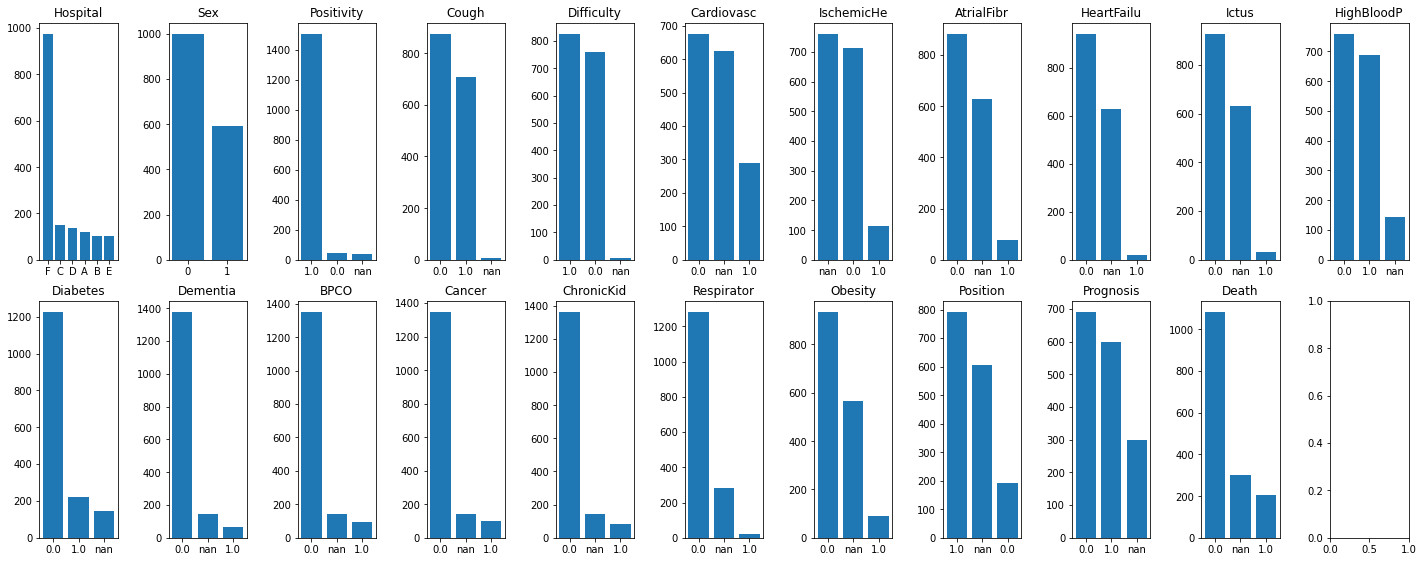

In [ ]:
cat_display(df=df_comm, cat_feat=cat_feat)

In [ ]:
def num_display(df, num_feat):
  fig, ax=plt.subplots(2,int(-(-len(num_feat)//2)), figsize=(15,8))
  plt.tight_layout(pad=2)

  a=0
  b=0

  for i in num_feat:
    ax[a,b].hist(x=list(df[i].values), bins=10)
    ax[a,b].set_title(i[:10])
    #ax[a,b].set_xticks(ticks=list(np.unique(df[i].values)))
    if b<=int(-(-len(num_feat)//2))-2:
     b=b+1
    else:
      b=0
      a=a+1

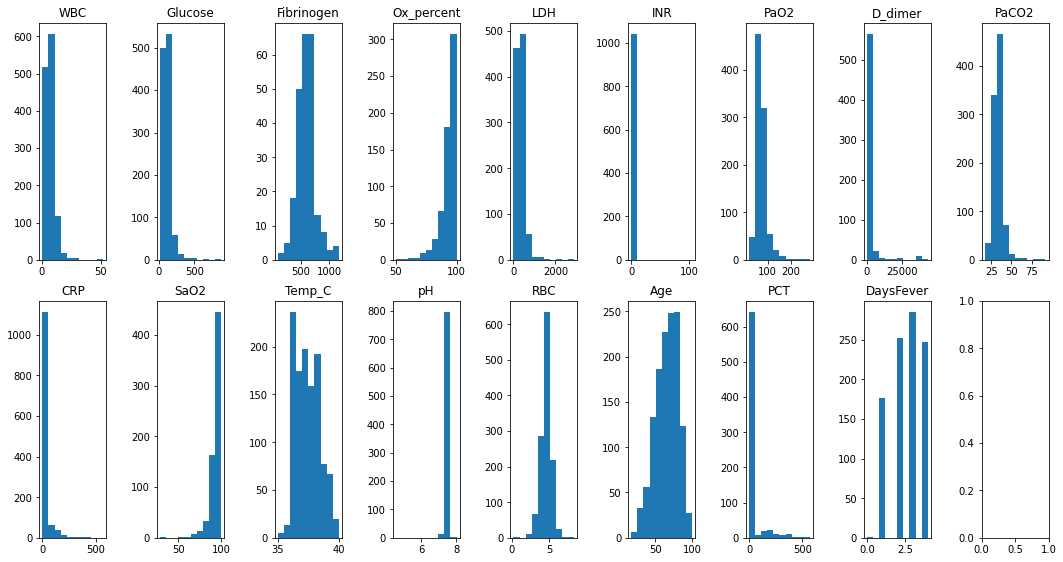

In [ ]:
num_display(df=df_train, num_feat=num_feat)

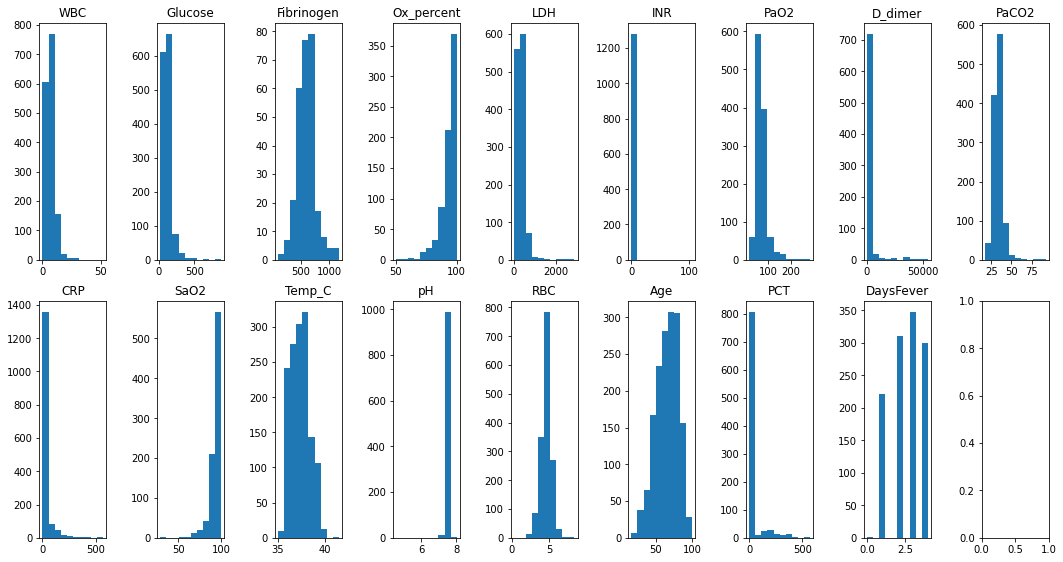

In [ ]:
num_display(df=df_comm, num_feat=num_feat)

### Correlations

In [ ]:
corr=df_comm.corr()
corr

,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Death
Age,1.000000,0.167351,-0.022512,-0.115689,-0.071898,-0.218842,0.051207,0.111552,-0.311022,0.094748,...,0.390999,0.133258,0.224967,0.180161,0.111757,0.133209,0.066411,-0.042087,0.248709,0.314927
Sex,0.167351,1.000000,-0.041719,-0.159509,-0.048832,-0.025533,-0.057393,-0.056758,-0.185314,-0.103580,...,0.053917,-0.089454,0.086065,0.012003,-0.013463,-0.023955,-0.005843,-0.044587,-0.001774,-0.019709
PositivityAtAdmission,-0.022512,-0.041719,1.000000,0.001845,0.041192,-0.017281,0.042779,-0.094083,0.034874,-0.130365,...,-0.012516,0.007762,-0.027235,-0.009394,-0.042937,-0.090815,-0.020027,0.010741,0.116445,-0.023612
Temp_C,-0.115689,-0.159509,0.001845,1.000000,0.069406,0.128306,0.043954,0.038966,0.047855,0.163662,...,-0.038001,-0.005951,-0.044150,0.007160,0.034807,-0.065107,-0.047044,0.035397,0.054798,0.040989
DaysFever,-0.071898,-0.048832,0.041192,0.069406,1.000000,0.177292,0.046688,0.058456,0.003030,0.073277,...,-0.035706,0.001574,-0.077057,-0.050576,-0.043652,-0.037469,-0.003143,0.058951,-0.046624,-0.073267
Cough,-0.218842,-0.025533,-0.017281,0.128306,0.177292,1.000000,-0.029948,-0.075945,0.093947,0.091031,...,-0.095098,-0.014594,-0.076647,-0.010655,-0.036752,-0.035473,-0.033558,0.015190,-0.091000,-0.074518
DifficultyInBreathing,0.051207,-0.057393,0.042779,0.043954,0.046688,-0.029948,1.000000,0.119211,-0.023051,0.084940,...,0.079303,0.069242,-0.023413,0.074976,-0.003250,0.018525,0.072166,0.080418,0.188855,0.150152
WBC,0.111552,-0.056758,-0.094083,0.038966,0.058456,-0.075945,0.119211,1.000000,-0.036047,0.231338,...,0.056772,0.040909,0.025020,0.060025,0.039550,0.047817,0.037380,0.016541,0.091800,0.094998
RBC,-0.311022,-0.185314,0.034874,0.047855,0.003030,0.093947,-0.023051,-0.036047,1.000000,-0.062977,...,-0.137867,-0.077594,-0.141582,-0.124352,-0.142687,-0.194692,-0.099796,0.062718,-0.155113,-0.140880
CRP,0.094748,-0.103580,-0.130365,0.163662,0.073277,0.091031,0.084940,0.231338,-0.062977,1.000000,...,0.061776,0.019254,0.025466,0.111784,0.030924,0.061564,0.016855,0.033213,-0.098299,0.183659


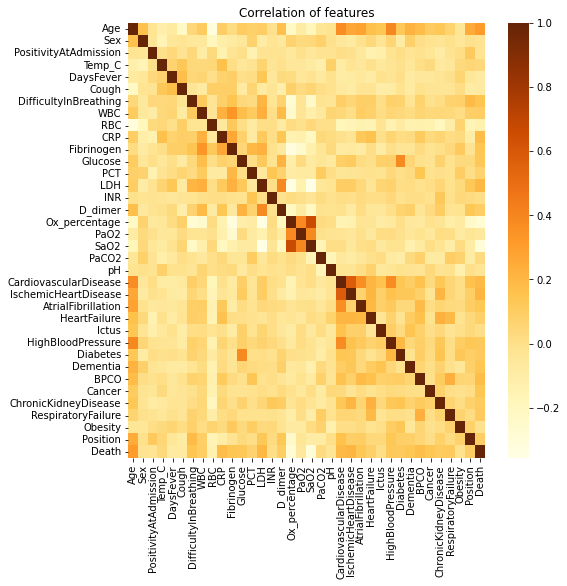

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, xticklabels=corr.index, yticklabels=corr.index, fmt="g", cmap="YlOrBr", annot=False)
plt.title("Correlation of features")
plt.show()

In [ ]:
def num_boxplot(df, feat):
  fig, ax=plt.subplots(2,int(-(-len(feat)//2)), figsize=(15,8))
  plt.tight_layout(pad=2)

  a=0
  b=0

  for i in feat:

    mild=list(df[(df["Prognosis"]==0) & (df[i].isnull()==False)][i].values)
    severe=list(df[(df["Prognosis"]==1) & (df[i].isnull()==False)][i].values)
    data=np.array([mild, severe], dtype=object)
    ax[a,b].boxplot(x=data)
    ax[a,b].set_title(i[:10])
    ax[a,b].set_xticks(ticks=[1,2])
    ax[a,b].set_xticklabels(labels=list(np.unique(df["Sex"].values)))
    
    if b<=int(-(-len(feat)//2))-2:
     b=b+1
    else:
      b=0
      a=a+1

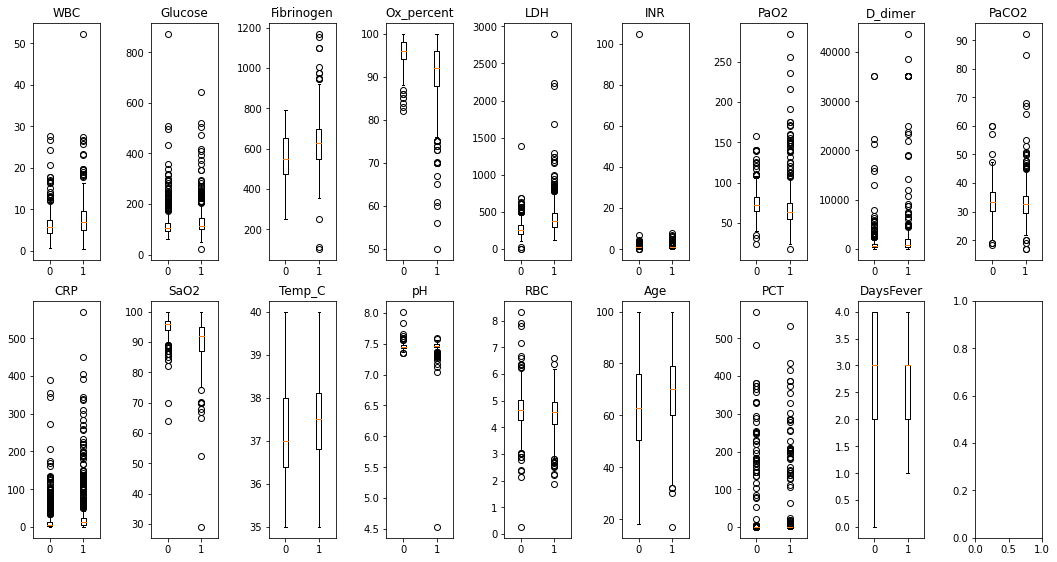

In [ ]:
num_boxplot(df=df_comm, feat=num_feat)

In the INR graph we see a radical outlier, I suppose this is a typo.

In [ ]:
print("INR mean:", df_comm.INR.mean())
print("\nINR outlier:\n", df_comm[df_comm["INR"]>100]["INR"])
print("INR max after outlier fix:", df_comm.drop(691, axis=0)["INR"].max())

INR mean: 1.2692642906784828

INR outlier:
 691    105.0
Name: INR, dtype: float64
INR max after outlier fix: 8.0


Let's fix this with a comma.

In [ ]:
df_train.loc[691, "INR"]=1.05
print("\nINR outlier:\n", df_train[df_train["INR"]>100]["INR"])


INR outlier:
 Series([], Name: INR, dtype: float64)


I wonder if the certain hospitals used the same protocol for prognosis categorization.

### Data proportions by Hospital

In [ ]:
def cat_disp_by_hosp(df, cat_feat):
  fig, ax=plt.subplots(len(cat_feat)-1,6, figsize=(15,20))
  plt.tight_layout(pad=2)

  a=0
  b=0
  cat_feat.remove("Hospital")

  for i in cat_feat:
    for j in set(df.Hospital.values):
      dr=df[df["Hospital"]==j][i].value_counts(dropna=False)/len(df[df["Hospital"]==j])
      x=list(dr.index)
      for n,g in enumerate(x):
        if pd.isnull(g):
          x[n]='nan'
        if pd.isnull(g)!=True:
          x[n]=str(x[n])
      h=list(dr.values)
      ax[a,b].bar(x=x, height=h)
      ax[a,b].set_title(i[:10]+" Hosp"+j)
      ax[a,b].set_xticklabels(x)
      if b<=4:
        b=b+1
      else:
        b=0
        a=a+1
  cat_feat.append("Hospital")

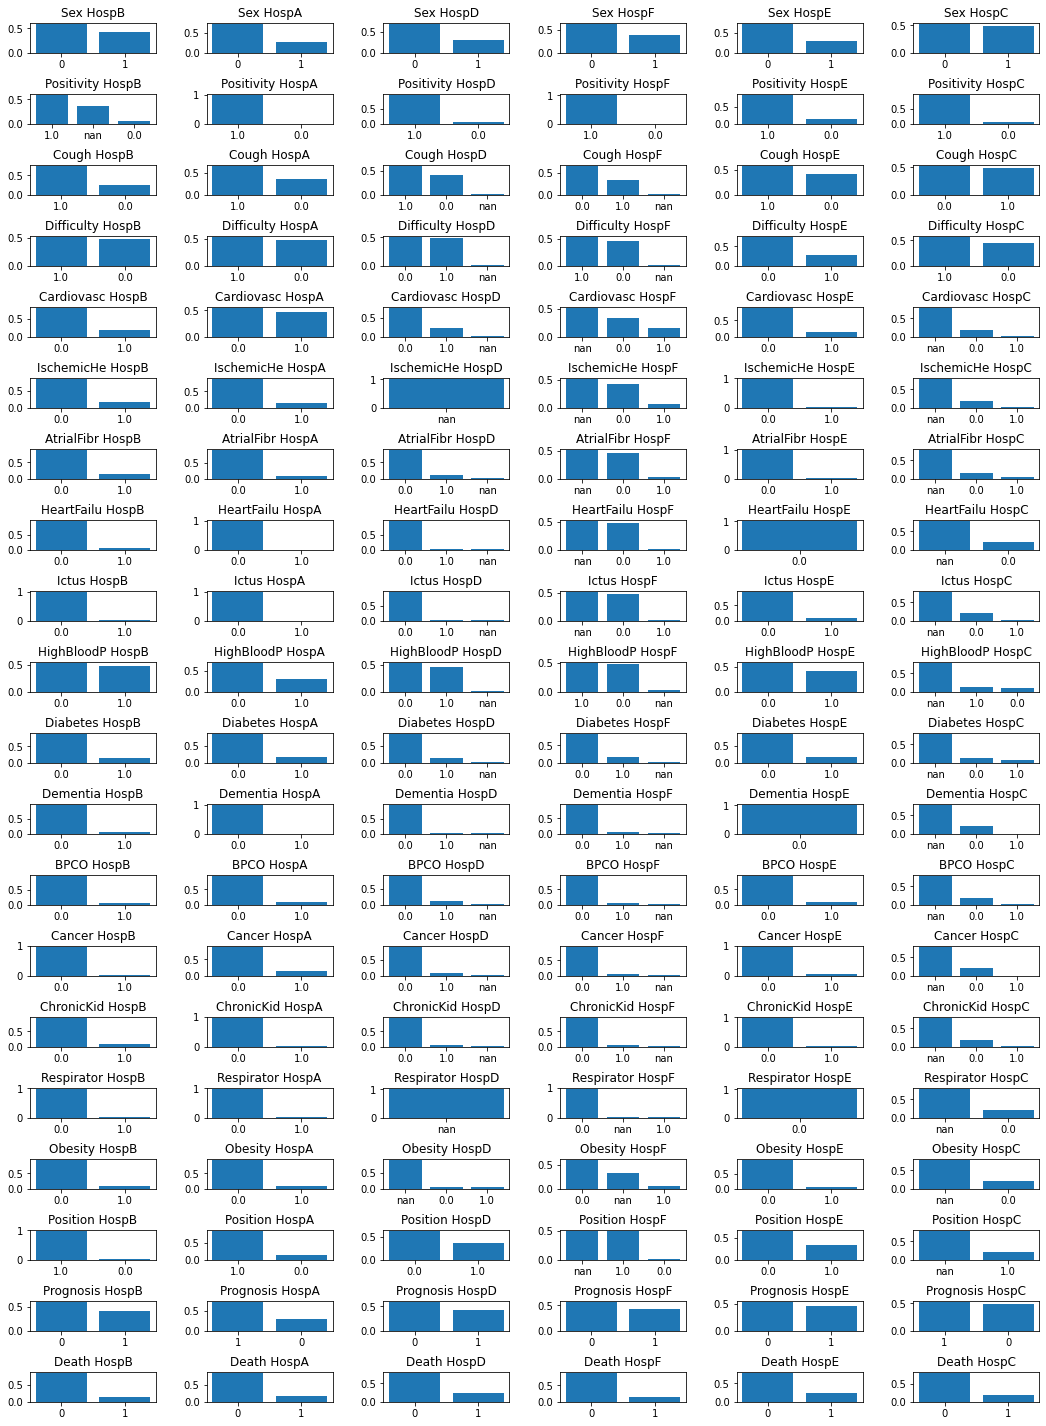

In [ ]:
cat_disp_by_hosp(df_train, cat_feat)

### Data imputation with predicted values

Let's create list of empty record line numbers per feature.
We do not want to fill the prognosis and death missing values in the train side of the common dataframe, so we separate them first.


In [ ]:
df_y_comm=df_comm.Prognosis.copy()
df_comm.drop(['Prognosis', "Death"], axis=1, inplace=True)

In [ ]:
empty_records={}
for i in df_comm.columns:
  empty_records[i]=df_comm[df_comm[i].isna()].index

#### Fill the missing values with simple approach
 - majority of categorical columns
 - mean of numeric and continuous columns

In [ ]:
# Categorical columns with missing values: a

a=df_comm.isna().sum()
a=a[a.values!=0]
a=set(a.index)
a.difference_update(list(num_feat))

#create temporary dataframe to fill missing values
df_comm_temp=df_comm.copy()

#fill missing categorical values 
for i in a:
  df_comm_temp[i]=df_comm_temp[i].fillna(df_comm_temp[i].value_counts().index[0])

In [ ]:
# numerical columns with missing values: b

b=df_comm_temp.isna().sum()
b=b[b.values!=0].index
for i in b:
  df_comm_temp[i]=df_comm_temp[i].fillna(df_comm_temp[i].mean())

In [ ]:
#df_comm_temp.isna().sum()

#### Recalculate the missing categorical values
based on the mixture of input data and constructed majority and mean values





In [ ]:
cat_feat.remove("Prognosis")
cat_feat.remove("Death")

In [ ]:
#first, let's recalculate the missing categorical values:

df_comm_temp_cat=df_comm_temp.copy()

start_step=time()

for i in a:
  y_train=df_comm_temp_cat[i]
  df_tr=df_comm_temp_cat.drop(i, axis=1)

  # one hot encoding
  cat_feat.remove(i)
  X_train = pd.get_dummies(df_tr[cat_feat], columns=df_tr[cat_feat].columns, prefix=df_tr[cat_feat].columns, drop_first=False)
  cat_feat.append(i)
  X_train[i]=y_train

  #create df to predict: missing value lines, df_tr columns
  X_missing=X_train.loc[empty_records[i]]
  X_missing.drop([i], axis=1, inplace=True)

  #delete rows to predict from train
  X_train.drop(empty_records[i], axis=0, inplace=True)

  #create output for training
  y_train=X_train[i]

  #delete output from training input dataset
  X_train.drop([i], axis=1, inplace=True)

  #print(i)

  #train model and predict a column's missing values
  rfc=skl.ensemble.RandomForestClassifier(
    n_estimators=100,criterion="entropy", bootstrap= False, max_depth=15)

  rfc.fit(X_train, y_train)

  rfc_pred_train=rfc.predict(X_missing)
  rfc_pred_train=pd.DataFrame(rfc_pred_train, columns=[i], index=X_missing.index)

  # write predicted result in original dataframe and also overwrite in the dataframe used for predictions of other columns:
  for j in rfc_pred_train.index:
    df_comm.at[j,i]=rfc_pred_train.loc[j].values[0]
    df_comm_temp_cat.loc[j,i]=rfc_pred_train.loc[j].values[0]

  end_step=time()
  #print('Cycle time:', end_step-start_step, 'sec\n')

In [ ]:
#df_comm.isna().sum()

#### Recalculate the missing numerical values

based on the mixture of input data and constructed mean values

The code below provided reasonable predicted numerical values for the features with more than ~200 existing value in the original dataset. 

Some others, like DaysFever, Glucose and D_dimer I had to run the code separately with tiny tweaks (order of prediction sequence etc), and got to reasonable data this way.

This result you can see below in the boxplots.
--- ---

For PCT and Fibrinogen features the amount of missing values were so high, that I could not conclude reasobanle predictions.

So I tried without normalization. 

In [ ]:
df_comm_temp_num=df_comm_temp[num_feat].copy()

start_step=time()
#c=["PCT"]

for i in b:
  # one hot encoding of categorical features
  df_cat_onehot = pd.get_dummies(df_comm_temp[cat_feat], columns=df_comm_temp[cat_feat].columns, prefix=df_comm_temp[cat_feat].columns, drop_first=False)
  #add numerical features to the one-hot-encoded train dataframe
  X_train=df_comm_temp_num.join(df_cat_onehot)
  #print("joined shape:", X_train.shape)

  # normalization
  SC =StandardScaler()
  SC.fit(X_train)
  X_train_std=pd.DataFrame(SC.transform(X_train), columns=X_train.columns, index=X_train.index)
  #X_train_std=pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns, index=X_train.index)

  #create df to predict: missing value lines
  X_missing=X_train_std.loc[empty_records[i]]
  X_missing.drop([i], axis=1, inplace=True)

  #create input for training: delete rows to predict from train
  X_train_std_input=X_train_std.drop(empty_records[i], axis=0)

  #create output for training
  y_train=X_train_std_input[i]

  #delete output from training input dataset
  X_train_std_input.drop([i], axis=1, inplace=True)

  #print(i)

  #train model and predict a column's missing values
  lr=LinearRegression(fit_intercept=False)

  lr.fit(X_train_std_input, y_train)

  lr_pred_train=lr.predict(X_missing)
  lr_pred_train=pd.DataFrame(lr_pred_train, columns=[i], index=X_missing.index)

  # display(lr_pred_train)
  for j in lr_pred_train.index:
    X_train_std.at[j,i]=lr_pred_train.loc[j].values[0]

  #Inverse transform predicted values from standardized into original feature space
  X_train_std=pd.DataFrame(SC.inverse_transform(X_train_std), columns=X_train_std.columns, index=X_train_std.index)

  # write predicted result in original dataframe and also overwrite in the dataframe used for predictions of other columns:
  for j in lr_pred_train.index:
    df_comm.at[j,i]=X_train_std.at[j,i].copy()
    df_comm_temp_num.loc[j,i]=X_train_std.at[j,i].copy()

  end_step=time()
  #print(i, 'Cycle time:', end_step-start_step, 'sec\n')

In [ ]:
#If you run this, You'll see there are no more missing values in the source dataframe
#df_comm.isna().sum()

In [ ]:
#num_boxplot(df=df_train, feat=num_feat)

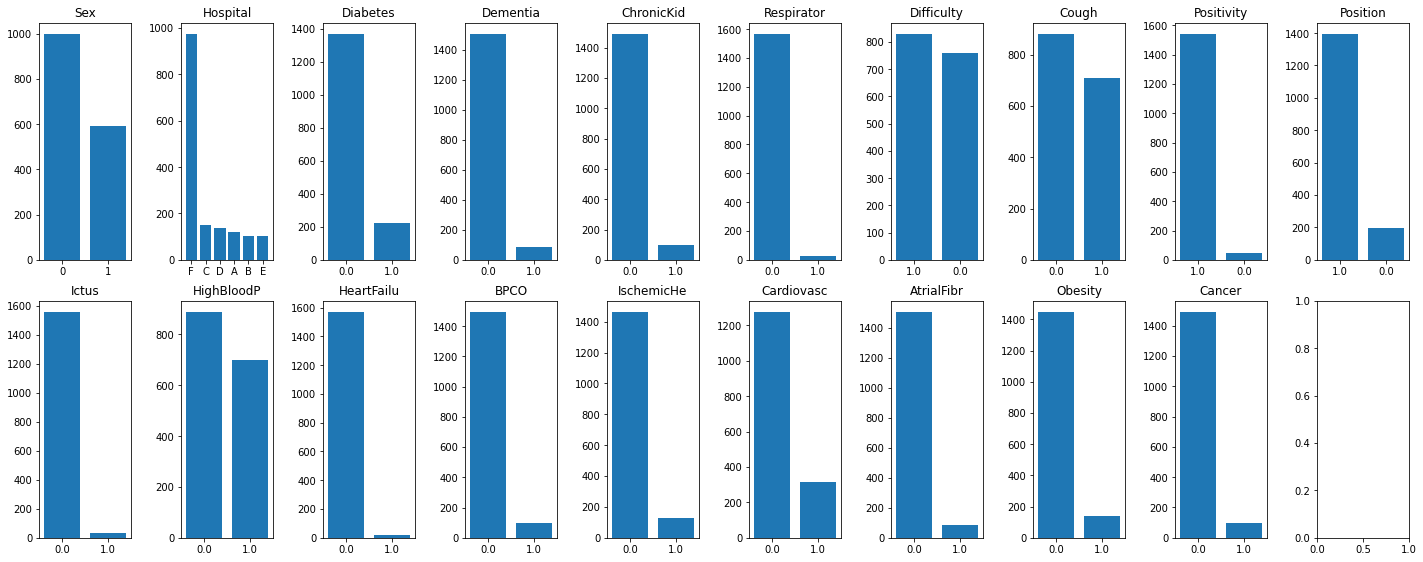

In [ ]:
cat_display(df=df_comm, cat_feat=cat_feat)

In [ ]:
df_comm["Prognosis"]=df_y_comm

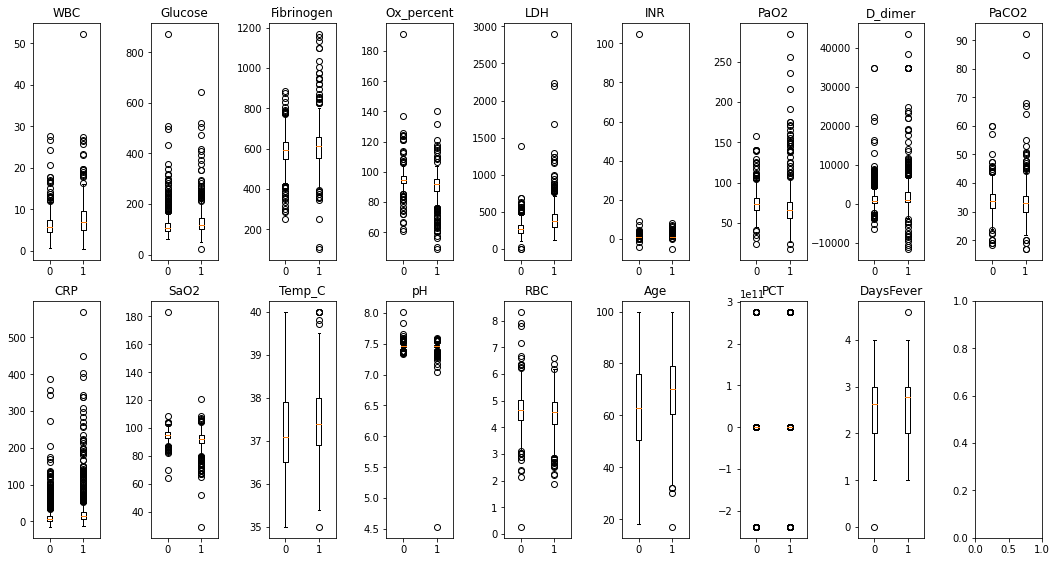

In [ ]:
num_boxplot(df=df_comm, feat=num_feat)

### Recalculate PCT missing features without standardization

In [ ]:
df_comm_temp_num=df_comm_temp[num_feat].copy()

start_step=time()
c=["PCT"]

for i in c:
  # one hot encoding of categorical features
  df_cat_onehot = pd.get_dummies(df_comm_temp[cat_feat], columns=df_comm_temp[cat_feat].columns, prefix=df_comm_temp[cat_feat].columns, drop_first=False)
  #add numerical features to the one-hot-encoded train dataframe
  X_train=df_comm_temp_num.join(df_cat_onehot)
  #print("joined shape:", X_train.shape)

  # normalization CANCELLED
  #SC =StandardScaler()
  #SC.fit(X_train)
  X_train_std=X_train #pd.DataFrame(SC.transform(X_train), columns=X_train.columns, index=X_train.index)
  #X_train_std=pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns, index=X_train.index)

  #create df to predict: missing value lines
  X_missing=X_train_std.loc[empty_records[i]]
  X_missing.drop([i], axis=1, inplace=True)

  #create input for training: delete rows to predict from train
  X_train_std_input=X_train_std.drop(empty_records[i], axis=0)

  #create output for training
  y_train=X_train_std_input[i]

  #delete output from training input dataset
  X_train_std_input.drop([i], axis=1, inplace=True)

  #print(i)

  #train model and predict a column's missing values
  lr=LinearRegression(fit_intercept=False)

  lr.fit(X_train_std_input, y_train)

  lr_pred_train=lr.predict(X_missing)
  lr_pred_train=pd.DataFrame(lr_pred_train, columns=[i], index=X_missing.index)

  # display(lr_pred_train)
  for j in lr_pred_train.index:
    X_train_std.at[j,i]=lr_pred_train.loc[j].values[0]

  #Inverse transform CANCELLED
  #X_train_std=pd.DataFrame(SC.inverse_transform(X_train_std), columns=X_train_std.columns, index=X_train_std.index)

  # write predicted result in original dataframe and also overwrite in the dataframe used for predictions of other columns:
  for j in lr_pred_train.index:
    df_comm.at[j,i]=X_train_std.at[j,i].copy()
    df_comm_temp_num.loc[j,i]=X_train_std.at[j,i].copy()

  end_step=time()
  print('Cycle time:', end_step-start_step, 'sec\n')

Cycle time: 0.18615174293518066 sec



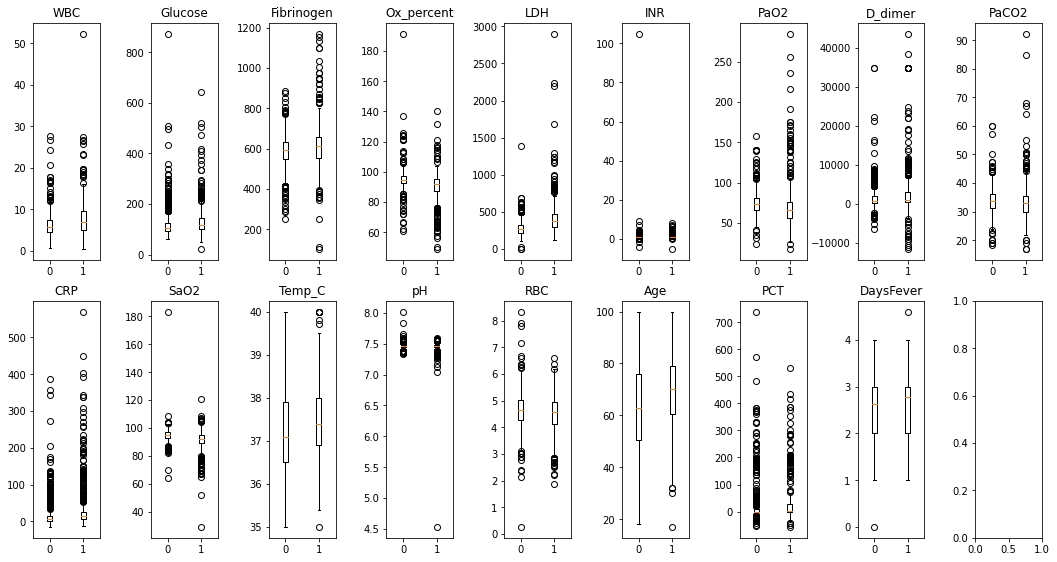

In [ ]:
num_boxplot(df=df_comm, feat=num_feat)

## SVM prediction, optimization and its performance

### Prepare dataframe for model training

In [ ]:
df_rep=df_comm[df_comm["tr/te"]=="tr"].copy()

In [ ]:
df_train=df_rep.copy()

In [ ]:
y=df_train.Prognosis.copy()
y=y.astype("int")
df_train.drop("Prognosis", axis=1, inplace=True)

#onehot encoding of categorical values of predicted, filled dataframe
#cat_feat.remove("Prognosis")
df_cat_onehot = pd.get_dummies(df_train[cat_feat], columns=df_train[cat_feat].columns, prefix=df_train[cat_feat].columns, drop_first=False)
#cat_feat.append("Prognosis")

# join categorical and numerical dataframe parts
df_train_num=df_train[num_feat].copy()
X=df_train_num.join(df_cat_onehot)
X

,WBC,Glucose,Fibrinogen,Ox_percentage,LDH,INR,PaO2,D_dimer,PaCO2,CRP,...,IschemicHeartDisease_0.0,IschemicHeartDisease_1.0,CardiovascularDisease_0.0,CardiovascularDisease_1.0,AtrialFibrillation_0.0,AtrialFibrillation_1.0,Obesity_0.0,Obesity_1.0,Cancer_0.0,Cancer_1.0
0,4.29,84.0,635.618098,96.000000,294.051628,1.589232,75.473504,-611.273567,34.646926,0.28,...,1,0,1,0,1,0,1,0,1,0
1,6.10,107.0,633.022999,95.000000,228.000000,1.996461,78.860725,-1309.534254,34.559912,2.06,...,1,0,0,1,1,0,1,0,1,0
2,10.34,159.0,637.557041,88.000000,243.000000,1.080000,87.000000,-3192.833665,43.000000,0.98,...,0,1,0,1,1,0,0,1,0,1
3,4.75,97.0,574.267660,96.000000,209.836850,1.180000,81.846212,-2242.946515,35.061249,0.51,...,1,0,1,0,1,0,1,0,1,0
4,5.14,126.0,628.118677,98.000000,340.213803,1.017430,89.000000,-530.107284,19.000000,3.21,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,10.62,143.0,682.062193,90.541838,490.000000,1.424416,75.075210,761.000000,33.195866,16.92,...,1,0,1,0,1,0,1,0,1,0
1285,9.67,109.0,623.328613,92.970269,278.000000,1.040000,73.026091,764.000000,29.800000,19.74,...,1,0,1,0,1,0,1,0,1,0
1286,4.80,107.0,613.972181,83.865438,533.000000,1.080000,45.600000,930.000000,30.700000,12.44,...,1,0,1,0,1,0,1,0,1,0
1287,6.30,126.0,602.752077,92.274350,210.000000,1.030000,64.200000,680.000000,30.600000,5.17,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
#Standardization
X_=pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns, index=X.index)


In [ ]:
#split df to train and test set
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)

### Balanced accuracy function

In [ ]:
def bal_acc(cm):
  TPR = cm[1,1] / (cm[1,1] + cm[0,1])
  TNR = cm[0,0] / (cm[0,0] + cm[1,0])
  result = (TPR + TNR) / 2
  return result

### SVM Model training

In [ ]:
def svm_trial(id, C=1, kernel="rbf", degree=3, gamma="scale"):
    rbf=svm.SVC(kernel=kernel, C=C, degree=degree, gamma=gamma)
    rbf.fit(X_train,y_train)

    y_pred_rbf=rbf.predict(X_test)
    x_pred_rbf=rbf.predict(X_train)

    cm_svm_test=confusion_matrix(y_pred_rbf, y_test)
    cm_svm_train=confusion_matrix(x_pred_rbf, y_train)

    accuracy_df[(kernel,C, gamma, degree, id)]=[bal_acc(cm_svm_test), bal_acc(cm_svm_train)]

    return accuracy_df

In [ ]:
def display(df):
  plt.figure(figsize=(20,6))
  plt.plot(accuracy_df.loc["test_bal_acc"].values)
  plt.plot(accuracy_df.loc["train_bal_acc"].values)
  l=[]
  for i in accuracy_df.columns.values:
    l.append(str(i))
  plt.xticks(range(0,len(accuracy_df.columns)),l, rotation='vertical')
  plt.show()

### SVM model parameter tuning


#### C parameter tuning

In [ ]:
accuracy_df=pd.DataFrame(index=["test_bal_acc","train_bal_acc"])

In [ ]:
for i in range(1,50):
  svm_trial(id=1, C=i/10, kernel="rbf", degree=3, gamma="scale")

In [ ]:
accuracy_df

,"(rbf, 0.1, scale, 3, 1)","(rbf, 0.2, scale, 3, 1)","(rbf, 0.3, scale, 3, 1)","(rbf, 0.4, scale, 3, 1)","(rbf, 0.5, scale, 3, 1)","(rbf, 0.6, scale, 3, 1)","(rbf, 0.7, scale, 3, 1)","(rbf, 0.8, scale, 3, 1)","(rbf, 0.9, scale, 3, 1)","(rbf, 1.0, scale, 3, 1)",...,"(rbf, 4.0, scale, 3, 1)","(rbf, 4.1, scale, 3, 1)","(rbf, 4.2, scale, 3, 1)","(rbf, 4.3, scale, 3, 1)","(rbf, 4.4, scale, 3, 1)","(rbf, 4.5, scale, 3, 1)","(rbf, 4.6, scale, 3, 1)","(rbf, 4.7, scale, 3, 1)","(rbf, 4.8, scale, 3, 1)","(rbf, 4.9, scale, 3, 1)"
test_bal_acc,0.732558,0.724806,0.717054,0.728682,0.736434,0.748062,0.744186,0.740310,0.740310,0.744186,...,0.751938,0.751938,0.748062,0.751938,0.751938,0.751938,0.755814,0.751938,0.751938,0.751938
train_bal_acc,0.722549,0.747592,0.777436,0.799315,0.819067,0.833673,0.851815,0.856616,0.861791,0.862683,...,0.910267,0.911158,0.913113,0.913113,0.913113,0.913113,0.914177,0.915068,0.915068,0.915068


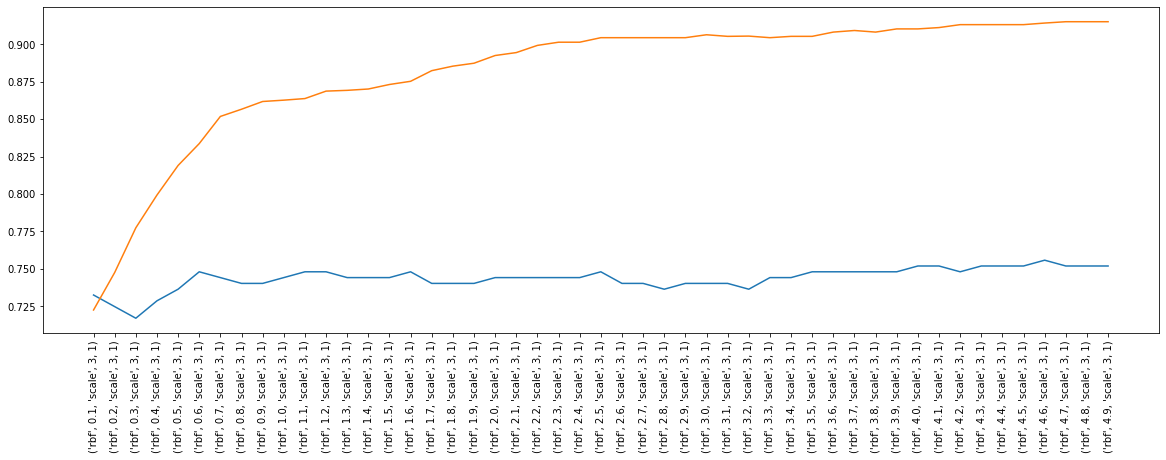

In [ ]:
display(accuracy_df)

The best C value:

In [ ]:
accuracy_df.loc[:,accuracy_df.loc["test_bal_acc"]==accuracy_df.loc["test_bal_acc"].max()]

,"(rbf, 4.6, scale, 3, 1)"
test_bal_acc,0.755814
train_bal_acc,0.914177


In [ ]:
# Delete some data from trial results that we do not need anymore
accuracy_df.drop(accuracy_df.iloc[:,:40].columns, axis=1, inplace=True)
#accuracy_df.drop(accuracy_df.iloc[:,3:].columns, axis=1, inplace=True)

#### Try some kernels

In [ ]:
kernel=['linear', 'poly', 'sigmoid']

In [ ]:
for i in kernel:
  svm_trial(id=1, C=4.8, kernel=i, degree=3, gamma="scale")

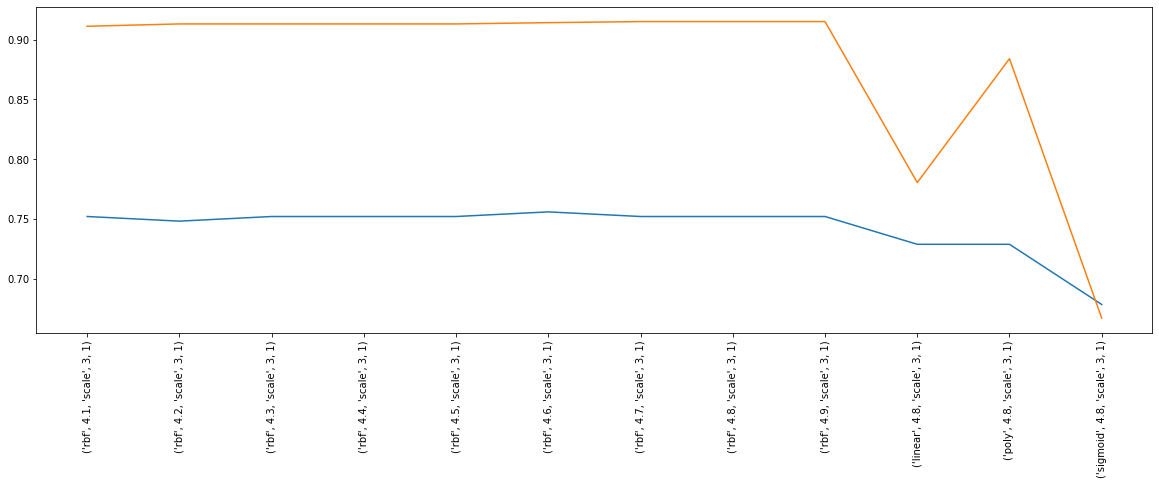

In [ ]:
display(accuracy_df)

Hmm, linear looks promising, let's confirm.

In [ ]:
for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
  svm_trial(id=i, C=4.8, kernel='linear', degree=3, gamma="scale")

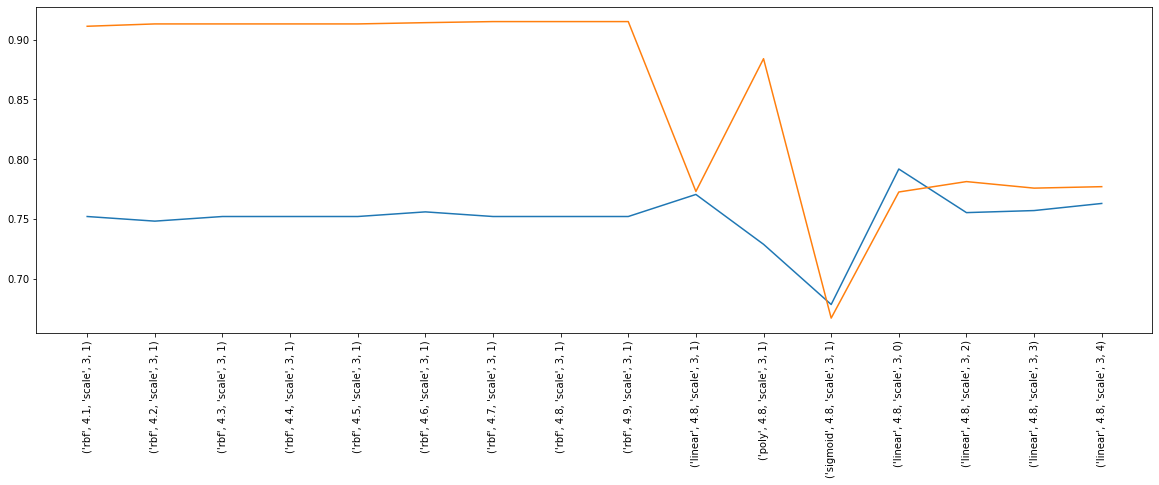

In [ ]:
display(accuracy_df)

The Gamma and the degree parameters are ignored in the linear method.

Let's see some more of the linear.

In [ ]:
for i in range(6,15):
  X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
  svm_trial(id=i, C=4.8, kernel='linear', degree=3, gamma="scale")

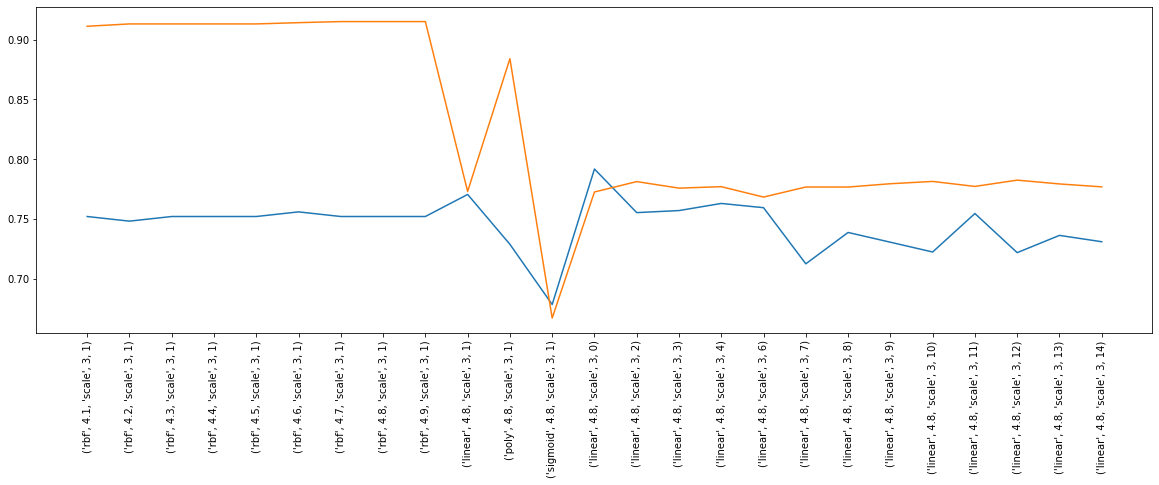

In [ ]:
display(accuracy_df)

It is visible that the average of the linear model prediction acccuracy is around 0.75, but it is quite sensitive to the random split of tha database.

To get a fair comparison we need to test the rbf kernel with resampling as well.

In [ ]:
for i in range(2,15):
  X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
  svm_trial(id=i, C=4.8, kernel='rbf', degree=3, gamma="scale")

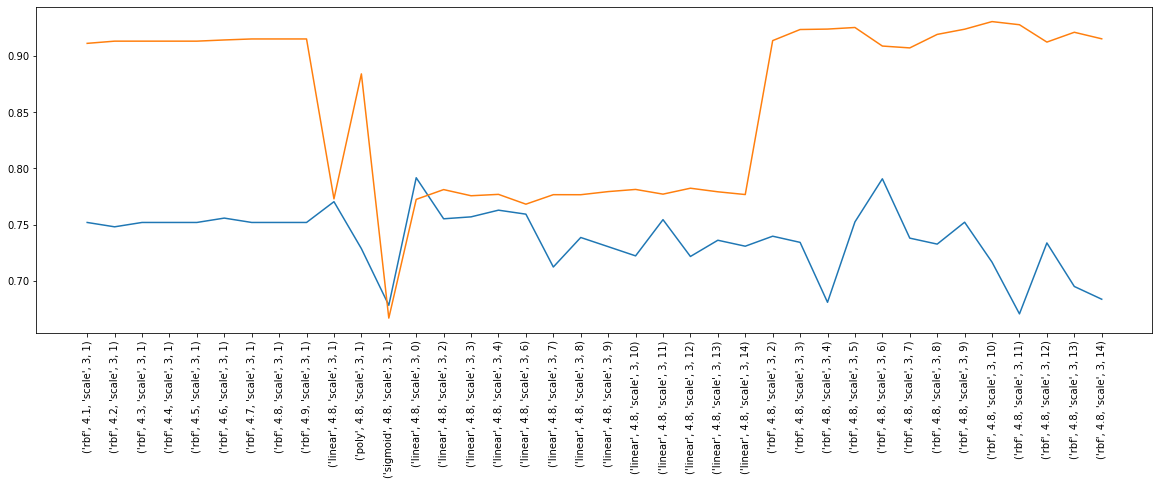

In [ ]:
display(accuracy_df)

We see that the rbf kernel test results are slightly worse than the linear model's.

Also interesting to see that the train accuracy almost equals the test accuracy with the linear kernel, although in case of the rbf kernel the model almost perfectly learns the train set, but the generalization is much poorer.


#### Final model parameters

Let's see finally the optimal C value again.

In [ ]:
q=[]
for i in range(1,21):
  q.append(round((i/3),1))

In [ ]:
accuracy_df=pd.DataFrame(index=["test_bal_acc","train_bal_acc"])

for j in q:
  for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
    svm_trial(id=i, C=j, kernel='linear')

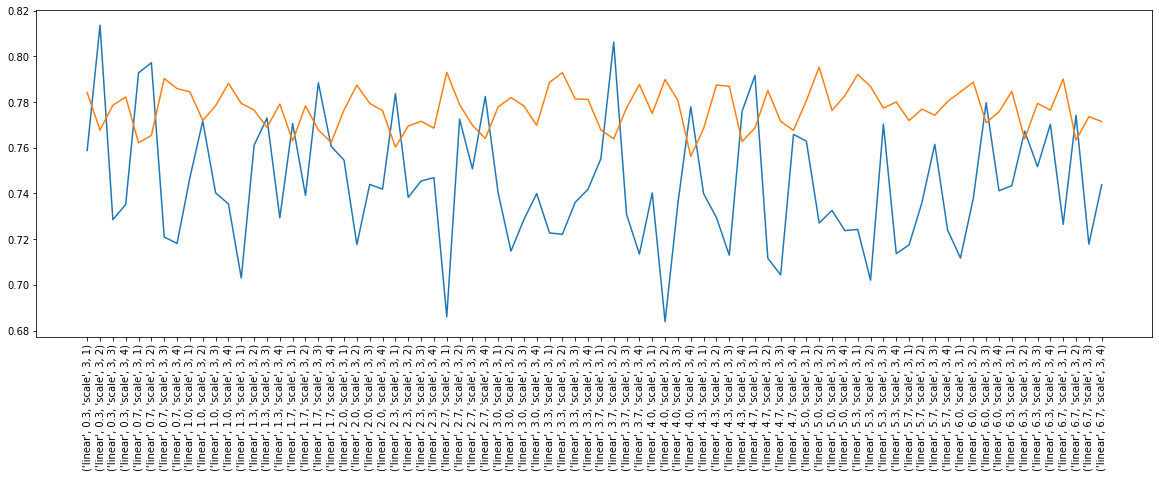

In [ ]:
display(accuracy_df)

It seems the test accuracy is not sensitive to the C value at all. Let's use 3.

### Create SVM submission

#### Create test set

In [ ]:
df_test=df_comm[df_comm["tr/te"]=="te"].copy()
df_test.drop(["Prognosis", "tr/te"], axis=1, inplace=True)

In [ ]:
#df_test.drop("Image",axis=1, inplace=True)

In [ ]:
df_test

,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,...,Ictus,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position
1289,A,72.000000,1,1.0,37.300000,3.000000,1.0,0.0,5.370000,4.58,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1290,D,60.791667,1,1.0,37.000000,2.000000,1.0,0.0,6.370000,4.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1291,D,51.983333,0,1.0,38.500000,4.000000,1.0,0.0,12.130000,4.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1292,D,62.891667,0,1.0,38.158988,2.335849,0.0,1.0,0.509028,5.11,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1293,E,44.000000,0,0.0,37.700000,4.000000,0.0,0.0,9.180000,5.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,F,50.000000,1,1.0,37.000000,2.000000,1.0,0.0,4.140000,4.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1585,F,81.000000,1,1.0,36.100000,2.564157,0.0,1.0,4.420000,4.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1586,F,68.000000,1,1.0,38.700000,2.298384,0.0,1.0,5.000000,4.62,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1587,F,60.000000,1,1.0,36.200000,2.000000,1.0,1.0,5.240000,3.84,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#onehot encoding of categorical values of predicted, filled dataframe
df_test_cat_onehot = pd.get_dummies(df_test[cat_feat], columns=df_test[cat_feat].columns, prefix=df_test[cat_feat].columns, drop_first=False)

# join categorical and numerical dataframe parts
df_test_num=df_test[num_feat].copy()
X_test_df=df_test_num.join(df_test_cat_onehot)
#X_test_df

In [ ]:
#X_test_df.isna().sum()

In [ ]:
rbf=svm.SVC(kernel="linear", C=3)
rbf.fit(X_train,y_train)

y_pred_linear=rbf.predict(X_test_df)
y_pred_linear=pd.DataFrame(y_pred_linear, columns=["Prognosis"])

In [ ]:
y_pred_linear.loc[y_pred_linear.Prognosis==0, "Prognosis"]="MILD"
y_pred_linear.loc[y_pred_linear.Prognosis==1, "Prognosis"]="SEVERE"
#y_pred_linear

In [ ]:
y_pred_linear.value_counts()

Prognosis
SEVERE       289
MILD          11
dtype: int64

## Combination model submission

### SVM prediction

The idea is that I train the SVM model (that I optimized in the 1st half of the notebook) and other 2 models and calculate prediction with the combination of them.

Then I compare the predictions of the 3 models and let the majority win.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)

In [ ]:
rbf=svm.SVC(kernel="linear", C=4.7)
rbf.fit(X_train,y_train)

y_pred_rbf=rbf.predict(X_test)
x_pred_rbf=rbf.predict(X_train)

cm_svm_test=confusion_matrix(y_pred_rbf, y_test)
cm_svm_train=confusion_matrix(x_pred_rbf, y_train)


In [ ]:
bal_acc(cm_svm_train)

0.7752556214002981

In [ ]:
bal_acc(cm_svm_test)

0.7266152362584377

### Create KNN prediction

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
knn_pred_train=knn.predict(X_train)
knn_pred_test=knn.predict(X_test)

print('knn train accuracy: ', bal_acc(confusion_matrix(y_train, knn_pred_train)))
print('knn test accuracy: ', bal_acc(confusion_matrix(y_test, knn_pred_test)))


knn train accuracy:  0.7824683846337389
knn test accuracy:  0.6803321224701608


### Random Forest prediction

In [ ]:
rfc=skl.ensemble.RandomForestClassifier(n_estimators=50, criterion="entropy", bootstrap= False)

rfc.fit(X_train, y_train)
rfc_pred_train=rfc.predict(X_train)
rfc_pred_test=rfc.predict(X_test)

print('rfc train accuracy: ', bal_acc(confusion_matrix(y_train, rfc_pred_train)))
print('rfc test accuracy: ', bal_acc(confusion_matrix(y_test, rfc_pred_test)))

rfc train accuracy:  1.0
rfc test accuracy:  0.749861461732652


### Combining the 3 models

In [ ]:
result=pd.DataFrame()

result["knn_pred_test"]=knn_pred_test
result["rfc_pred_test"]=rfc_pred_test
result['SVM']=y_pred_rbf
result['true_label']=y_test.values

result["embedded_prediction"]=result[["knn_pred_test", "rfc_pred_test", "SVM"]].mode(axis=1)[0]


In [ ]:
print('embedded prediction accuracy: ', bal_acc(confusion_matrix(y_test, result.embedded_prediction)))

embedded prediction accuracy:  0.7746797053908523


It is joyful that the combined result of the 3 models actually improve the balanced accuracy on this split of the training set. So let's make a prediction for the test set.


### Freestyle submission

In [ ]:
result=pd.DataFrame()

knn_pred_test=knn.predict(X_test_df)
rfc_pred_test=rfc.predict(X_test_df)
y_pred_rbf=rbf.predict(X_test_df)

result["knn_pred_test"]=knn_pred_test
result["rfc_pred_test"]=rfc_pred_test
result['SVM']=y_pred_rbf

result["Prognosis"]=result[["knn_pred_test", "rfc_pred_test", "SVM"]].mode(axis=1)[0]

In [ ]:
result.loc[result.Prognosis==0, "Prognosis"]="MILD"
result.loc[result.Prognosis==1, "Prognosis"]="SEVERE"

In [ ]:
result["Prognosis"].value_counts()

SEVERE    300
Name: Prognosis, dtype: int64

In [ ]:
y_pred_linear.to_csv('/content/dm_competition4_Norbert_Peto_submission2.csv', index = False, header=False, sep=" ")